In [98]:
#-*- coding: utf-8 -*-
from konlpy.utils import pprint
from konlpy.tag import *
import datetime
import time
import csv
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import seaborn as sns
import dateutil
import random
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

In [2]:
# file path
PATH = '../dataset/physiogel.csv'

In [3]:
df0 = pd.read_csv(PATH)
df0.tail(10)

,uid,user_name,rating,date,text,option_name,help_count,perfume,moisture
7015,958519,오*경,NaN,2015.11.08,\n \n ...,피지오겔 DMT 크림\n 150ml,2,NaN,NaN
7016,958285,박*진,NaN,2015.11.08,\n \n ...,피지오겔 DMT 크림\n 150ml,2,NaN,NaN
7017,955039,그린벨,NaN,2015.11.07,\n \n ...,피지오겔 DMT 크림\n 150ml,1,NaN,NaN
7018,944449,정*미,NaN,2015.11.05,\n \n ...,피지오겔 DMT 크림\n 150ml,0,NaN,NaN
7019,916315,김*희,NaN,2015.11.01,\n \n ...,피지오겔 DMT 크림\n 150ml,0,NaN,NaN
7020,916184,박*선,NaN,2015.11.01,\n \n ...,피지오겔 DMT 크림\n 150ml,6,NaN,NaN
7021,875538,김*진,NaN,2015.10.24,\n \n ...,피지오겔 DMT 크림\n 150ml,0,NaN,NaN
7022,859519,목*균,NaN,2015.10.21,\n \n ...,피지오겔 DMT 크림\n 150ml,2,NaN,NaN
7023,765117,정*정,NaN,2015.10.05,\n \n ...,피지오겔 DMT 크림\n 150ml,0,NaN,NaN
7024,746711,장*순,NaN,2015.10.02,\n \n ...,피지오겔 DMT 크림\n 150ml,12,NaN,NaN


In [4]:
df0.shape

(7025, 9)

# Text 리뷰 분류

In [5]:
# set to show all text in the cell
pd.set_option('display.max_colwidth', -1)

In [6]:
df00 = df0.dropna(subset=['text'])
df00

,uid,user_name,rating,date,text,option_name,help_count,perfume,moisture
8,28618460,정*지,NaN,2017.08.05,\n \n 매번 사용하는 제품인데 저렴하게 잘 삿습니당\n \n,"피지오겔 데일리 모이스쳐 테라피 페이셜 크림, 150ml",0,아주 만족해요,예상만큼 좋아요
9,28608506,강*진,NaN,2017.08.05,\n \n 몇 년째 쓰는 제품이예요~\n다른 기초화장품 없이 피지오겔크링과 선크림으로\n피부가 좋아졌 어요~~ 여름이면 항상 얼굴이 따끔거렸는데 \n그것도 다 없어지고~ 암튼 전 화장품은 이거 하나만발라요~\n자극도 없고 완전 좋은 제품입니다~~\n \n,"피지오겔 데일리 모이스쳐 테라피 페이셜 크림, 150ml",0,아주 만족해요,예상만큼 좋아요
13,28584972,정*훈,NaN,2017.08.05,\n \n 조금 기름진느낌이 없지않아있어요\n \n,"피지오겔 데일리 모이스쳐 테라피 페이셜 크림, 150ml",0,NaN,NaN
14,28584914,조*라,NaN,2017.08.05,\n \n 가격부담이 되도 계속 쓰고 있는 피지오겔 크림\n귀찮을때 이거 하나만 바르고 자도 다음날 화장 잘먹고 얼굴에서 광나요\n전 밤엔 듬뿍 아침엔 적당량만 발라요(집순이일땐 듬뿍)\n건성 민감성 피부에 좋아요 무향에 자극없고 보습력 좋아요\n로켓배송 덕분에 빠르게 쓸 수 있어서 좋았어요\n \n,"피지오겔 데일리 모이스쳐 테라피 페이셜 크림, 150ml",0,아주 만족해요,예상만큼 좋아요
15,28581673,안*영,NaN,2017.08.04,\n \n 촉촉해서 수분크림대신바르는데 좋아요\n \n,"피지오겔 데일리 모이스쳐 테라피 페이셜 크림, 150ml",0,NaN,NaN
16,28567308,윤*나,NaN,2017.08.04,\n \n 배송빨라 좋네요\n \n,"피지오겔 데일리 모이스쳐 테라피 페이셜 크림, 150ml",0,아주 만족해요,예상만큼 좋아요
23,28542147,김*희,NaN,2017.08.04,"\n \n 1. 배송 : 로켓 아니어도 괜찬은데, 다음날 바로 도착헸네요. 배송기사님 감사합니다.\n2. 제품 : 피지오겔 크림 똑같은 것으로 또 주문해서 사용합니다. 저는 민감피부라 무향을 선호해서 무향이라 좋고, 사계절 내내 사용하기 무리없구요. 여름엔 생각보단 덜 번들거리고, 겨울엔 저녁에 바르면 아침까지 건조함이 없어 좋습니다. 주문하면서 사용기한 내심 걱정했는데, 이번에도 안심이네요. (제가 사용하는 기간까지 넉넉해요-유통기한이 내년5월?6월까지인것 같았어요. 제품받고 며칠지난터라 정확한 기억이 안남.)\n \n","피지오겔 데일리 모이스쳐 테라피 페이셜 크림, 150ml",0,아주 만족해요,예상만큼 좋아요
31,28465156,최*희,NaN,2017.08.03,\n \n 피지오겔~7년째사용중~~\n \n,"피지오겔 데일리 모이스쳐 테라피 페이셜 크림, 150ml",0,NaN,NaN
32,28463679,나랑맘,NaN,2017.08.03,\n \n 항상 쓰던 제품입니다 좋아요~~\n \n,"피지오겔 데일리 모이스쳐 테라피 페이셜 크림, 150ml",0,NaN,NaN
34,28454963,한*희,NaN,2017.08.02,\n \n 배송도 빠르고 좋으네영\n \n,"피지오겔 데일리 모이스쳐 테라피 페이셜 크림, 150ml",0,아주 만족해요,NaN


In [7]:
temp = [x.strip().decode('utf-8') for x in df00['text'].values] # erase back and foward spaces/ decoding to unicode 
df = pd.DataFrame(data=temp, index=df00['uid'], columns=['text'])
df

,text
uid,
28618460,매번 사용하는 제품인데 저렴하게 잘 삿습니당
28608506,몇 년째 쓰는 제품이예요~\n다른 기초화장품 없이 피지오겔크링과 선크림으로\n피부가 좋아졌 어요~~ 여름이면 항상 얼굴이 따끔거렸는데 \n그것도 다 없어지고~ 암튼 전 화장품은 이거 하나만발라요~\n자극도 없고 완전 좋은 제품입니다~~
28584972,조금 기름진느낌이 없지않아있어요
28584914,가격부담이 되도 계속 쓰고 있는 피지오겔 크림\n귀찮을때 이거 하나만 바르고 자도 다음날 화장 잘먹고 얼굴에서 광나요\n전 밤엔 듬뿍 아침엔 적당량만 발라요(집순이일땐 듬뿍)\n건성 민감성 피부에 좋아요 무향에 자극없고 보습력 좋아요\n로켓배송 덕분에 빠르게 쓸 수 있어서 좋았어요
28581673,촉촉해서 수분크림대신바르는데 좋아요
28567308,배송빨라 좋네요
28542147,"1. 배송 : 로켓 아니어도 괜찬은데, 다음날 바로 도착헸네요. 배송기사님 감사합니다.\n2. 제품 : 피지오겔 크림 똑같은 것으로 또 주문해서 사용합니다. 저는 민감피부라 무향을 선호해서 무향이라 좋고, 사계절 내내 사용하기 무리없구요. 여름엔 생각보단 덜 번들거리고, 겨울엔 저녁에 바르면 아침까지 건조함이 없어 좋습니다. 주문하면서 사용기한 내심 걱정했는데, 이번에도 안심이네요. (제가 사용하는 기간까지 넉넉해요-유통기한이 내년5월?6월까지인것 같았어요. 제품받고 며칠지난터라 정확한 기억이 안남.)"
28465156,피지오겔~7년째사용중~~
28463679,항상 쓰던 제품입니다 좋아요~~


In [253]:
df[:100]

,text
uid,
28618460,매번 사용하는 제품인데 저렴하게 잘 삿습니당
28608506,몇 년째 쓰는 제품이예요~\n다른 기초화장품 없이 피지오겔크링과 선크림으로\n피부가 좋아졌 어요~~ 여름이면 항상 얼굴이 따끔거렸는데 \n그것도 다 없어지고~ 암튼 전 화장품은 이거 하나만발라요~\n자극도 없고 완전 좋은 제품입니다~~
28584972,조금 기름진느낌이 없지않아있어요
28584914,가격부담이 되도 계속 쓰고 있는 피지오겔 크림\n귀찮을때 이거 하나만 바르고 자도 다음날 화장 잘먹고 얼굴에서 광나요\n전 밤엔 듬뿍 아침엔 적당량만 발라요(집순이일땐 듬뿍)\n건성 민감성 피부에 좋아요 무향에 자극없고 보습력 좋아요\n로켓배송 덕분에 빠르게 쓸 수 있어서 좋았어요
28581673,촉촉해서 수분크림대신바르는데 좋아요
28567308,배송빨라 좋네요
28542147,"1. 배송 : 로켓 아니어도 괜찬은데, 다음날 바로 도착헸네요. 배송기사님 감사합니다.\n2. 제품 : 피지오겔 크림 똑같은 것으로 또 주문해서 사용합니다. 저는 민감피부라 무향을 선호해서 무향이라 좋고, 사계절 내내 사용하기 무리없구요. 여름엔 생각보단 덜 번들거리고, 겨울엔 저녁에 바르면 아침까지 건조함이 없어 좋습니다. 주문하면서 사용기한 내심 걱정했는데, 이번에도 안심이네요. (제가 사용하는 기간까지 넉넉해요-유통기한이 내년5월?6월까지인것 같았어요. 제품받고 며칠지난터라 정확한 기억이 안남.)"
28465156,피지오겔~7년째사용중~~
28463679,항상 쓰던 제품입니다 좋아요~~


In [8]:
df.shape

(3072, 1)

In [243]:
temp = [len(x) for x in df.text.values]

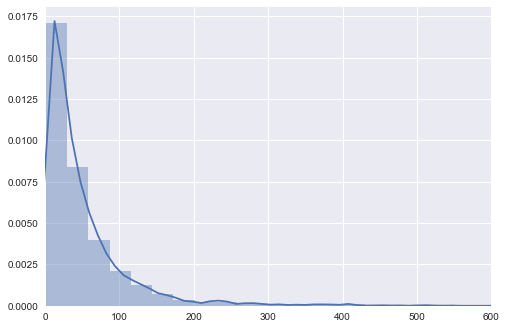

In [252]:
sns.distplot(temp)
plt.xlim(0,600)
plt.show()

# 형태소 분석

In [9]:
kkma = Kkma()
han = Hannanum()
twitter = Twitter()
komoran = Komoran()

### 명사 추출

In [10]:
tx = df.iloc[[1]].text.values[0]
print(tx)

몇 년째 쓰는 제품이예요~
다른 기초화장품 없이 피지오겔크링과 선크림으로
피부가 좋아졌 어요~~ 여름이면 항상 얼굴이  따끔거렸는데 
그것도 다 없어지고~  암튼 전 화장품은 이거 하나만발라요~
자극도 없고 완전 좋은 제품입니다~~


In [25]:
tx1 = df.iloc[[3]].text.values[0]
print(tx1)

가격부담이 되도 계속 쓰고 있는 피지오겔 크림
귀찮을때 이거 하나만 바르고 자도 다음날 화장 잘먹고 얼굴에서 광나요
전 밤엔 듬뿍 아침엔 적당량만 발라요(집순이일땐 듬뿍)
건성 민감성 피부에 좋아요 무향에 자극없고 보습력 좋아요
로켓배송 덕분에 빠르게 쓸 수 있어서 좋았어요


* Kkma

In [11]:
pprint(kkma.nouns(tx))

[년,
 제품,
 예,
 기초,
 기초화장품,
 화장품,
 오,
 오겔크링,
 겔크,
 링,
 선,
 선크림,
 크림,
 피부,
 여름,
 얼굴,
 그것,
 전,
 이거,
 하나,
 자극,
 완전]


* Hannanum

In [12]:
pprint(han.nouns(tx))

[몇,
 년,
 제품,
 기초화장품,
 피지오겔크링,
 선크,
 피부,
 좋아졌,
 어요~~,
 여름,
 얼굴,
 그것,
 암튼,
 전,
 화장품,
 이거,
 하나만발라요,
 자극,
 완전,
 제품]


* Twitter

In [13]:
pprint(twitter.nouns(tx))

[몇,
 년,
 제품,
 다른,
 기초,
 화장품,
 겔,
 링,
 선크림,
 피부,
 어요,
 여름,
 이면,
 항상,
 얼굴,
 거렸,
 데,
 그것,
 전,
 화장품,
 거,
 하나,
 발라,
 자극,
 완전,
 제품]


* Komoran

### POS Tagging

In [17]:
pos = twitter.pos(tx)
pprint(pos)

[(몇, Noun),
 (년, Noun),
 (째, Suffix),
 (쓰는, Verb),
 (제품, Noun),
 (이, Suffix),
 (예요, Josa),
 (~, Punctuation),
 (다른, Noun),
 (기초, Noun),
 (화장품, Noun),
 (없이, Adverb),
 (피, Verb),
 (지, PreEomi),
 (오, Eomi),
 (겔, Noun),
 (크, Verb),
 (링, Noun),
 (과, Josa),
 (선크림, Noun),
 (으로, Josa),
 (피부, Noun),
 (가, Josa),
 (좋아졌, Adjective),
 (어요, Noun),
 (~~, Punctuation),
 (여름, Noun),
 (이면, Noun),
 (항상, Noun),
 (얼굴, Noun),
 (이, Josa),
 (따끔, Adverb),
 (거렸, Noun),
 (는, Josa),
 (데, Noun),
 (그것, Noun),
 (도, Josa),
 (다, Adverb),
 (없어지, Verb),
 (고, Eomi),
 (~, Punctuation),
 (암튼, Adverb),
 (전, Noun),
 (화장품, Noun),
 (은, Josa),
 (이, Determiner),
 (거, Noun),
 (하나, Noun),
 (만, Josa),
 (발라, Noun),
 (요, Josa),
 (~, Punctuation),
 (자극, Noun),
 (도, Josa),
 (없고, Adjective),
 (완전, Noun),
 (좋, Adjective),
 (은, Eomi),
 (제품, Noun),
 (입니, Adjective),
 (다, Eomi),
 (~~, Punctuation)]


In [20]:
type(pos)

list

# Simple Cluster with BOW

In [55]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [32]:
vect = CountVectorizer(tokenizer=twitter.nouns)

In [40]:
vect.fit([tx, tx1])
pprint(vect.vocabulary_)

{가격부담이: 0,
 건성: 1,
 계속: 2,
 광나요: 3,
 귀찮을때: 4,
 그것도: 5,
 기초화장품: 6,
 년째: 7,
 다른: 8,
 다음날: 9,
 덕분에: 10,
 되도: 11,
 듬뿍: 12,
 따끔거렸는데: 13,
 로켓배송: 14,
 무향에: 15,
 민감성: 16,
 바르고: 17,
 발라요: 18,
 밤엔: 19,
 보습력: 20,
 빠르게: 21,
 선크림으로: 22,
 쓰고: 23,
 쓰는: 24,
 아침엔: 25,
 암튼: 26,
 어요: 27,
 얼굴에서: 28,
 얼굴이: 29,
 없고: 30,
 없어지고: 31,
 없이: 32,
 여름이면: 33,
 완전: 34,
 이거: 35,
 있는: 36,
 있어서: 37,
 자극도: 38,
 자극없고: 39,
 자도: 40,
 잘먹고: 41,
 적당량만: 42,
 제품이예요: 43,
 제품입니다: 44,
 좋아요: 45,
 좋아졌: 46,
 좋았어요: 47,
 좋은: 48,
 집순이일땐: 49,
 크림: 50,
 피부가: 51,
 피부에: 52,
 피지오겔: 53,
 피지오겔크링과: 54,
 하나만: 55,
 하나만발라요: 56,
 항상: 57,
 화장: 58,
 화장품은: 59}


In [42]:
vect.transform([tx]).toarray()

array([[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1]])

In [43]:
vect.transform([tx1]).toarray()

array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 2, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0]])

In [44]:
vect.transform([tx, tx1]).toarray()

array([[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 2, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0]])

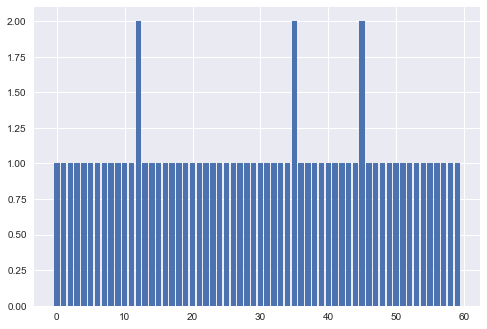

In [45]:
count = vect.transform([tx, tx1]).toarray().sum(axis=0)
plt.bar(range(len(count)), count)
plt.show()

### Stop Words  

Stop Words 는 문서에서 단어장을 생성할 때 무시할 수 있는 단어를 말한다. 보통 영어의 관사나 접속사, 한국어의 조사 등이 여기에 해당한다. stop_words 인수로 조절할 수 있다.

> 단어별 중요도 판별 알고리즘 적용해서 구분해보자

In [39]:
#vect = CountVectorizer(stop_words=["and", "is", "the", "this"]).fit(corpus)
#vect.vocabulary_

# Cluster 1

In [46]:
df.head(10)a

,text
uid,
28618460,매번 사용하는 제품인데 저렴하게 잘 삿습니당
28608506,몇 년째 쓰는 제품이예요~\n다른 기초화장품 없이 피지오겔크링과 선크림으로\n피부가 좋아졌 어요~~ 여름이면 항상 얼굴이 따끔거렸는데 \n그것도 다 없어지고~ 암튼 전 화장품은 이거 하나만발라요~\n자극도 없고 완전 좋은 제품입니다~~
28584972,조금 기름진느낌이 없지않아있어요
28584914,가격부담이 되도 계속 쓰고 있는 피지오겔 크림\n귀찮을때 이거 하나만 바르고 자도 다음날 화장 잘먹고 얼굴에서 광나요\n전 밤엔 듬뿍 아침엔 적당량만 발라요(집순이일땐 듬뿍)\n건성 민감성 피부에 좋아요 무향에 자극없고 보습력 좋아요\n로켓배송 덕분에 빠르게 쓸 수 있어서 좋았어요
28581673,촉촉해서 수분크림대신바르는데 좋아요
28567308,배송빨라 좋네요
28542147,"1. 배송 : 로켓 아니어도 괜찬은데, 다음날 바로 도착헸네요. 배송기사님 감사합니다.\n2. 제품 : 피지오겔 크림 똑같은 것으로 또 주문해서 사용합니다. 저는 민감피부라 무향을 선호해서 무향이라 좋고, 사계절 내내 사용하기 무리없구요. 여름엔 생각보단 덜 번들거리고, 겨울엔 저녁에 바르면 아침까지 건조함이 없어 좋습니다. 주문하면서 사용기한 내심 걱정했는데, 이번에도 안심이네요. (제가 사용하는 기간까지 넉넉해요-유통기한이 내년5월?6월까지인것 같았어요. 제품받고 며칠지난터라 정확한 기억이 안남.)"
28465156,피지오겔~7년째사용중~~
28463679,항상 쓰던 제품입니다 좋아요~~


In [51]:
corpus = df.text.values
corpus.shape

(3072,)

In [56]:
vect0 = CountVectorizer(tokenizer=twitter.nouns)
vect1 = TfidfVectorizer(tokenizer=twitter.nouns)

In [57]:
%%time
vect0.fit(corpus)
pprint(vect0.vocabulary_)

{가격: 0,
 가구: 1,
 가까이: 2,
 가끔: 3,
 가나: 4,
 가늠: 5,
 가능: 6,
 가득: 7,
 가뜩이나: 8,
 가라: 9,
 가려움: 10,
 가려움증: 11,
 가렵: 12,
 가렵거: 13,
 가렵다: 14,
 가로: 15,
 가루: 16,
 가막: 17,
 가면: 18,
 가뭄: 19,
 가바: 20,
 가발: 21,
 가방: 22,
 가보: 23,
 가성: 24,
 가슴: 25,
 가습기: 26,
 가야: 27,
 가약: 28,
 가요: 29,
 가운데: 30,
 가원: 31,
 가을: 32,
 가인: 33,
 가장: 34,
 가족: 35,
 가지: 36,
 가짜: 37,
 가치: 38,
 가품: 39,
 각자: 40,
 각종: 41,
 각질: 42,
 간: 43,
 간성: 44,
 간지럼: 45,
 간혹: 46,
 갈색: 47,
 갈팡질팡: 48,
 감: 49,
 감각: 50,
 감기: 51,
 감동: 52,
 감사: 53,
 감사용: 54,
 감사헤: 55,
 감안: 56,
 감쪽: 57,
 감탄: 58,
 감탄사: 59,
 갑: 60,
 갑자기: 61,
 갑지: 62,
 값: 63,
 갓: 64,
 갓난아기: 65,
 강: 66,
 강아지: 67,
 강철: 68,
 강추: 69,
 강추임: 70,
 개: 71,
 개덯: 72,
 개봉: 73,
 개새: 74,
 개선: 75,
 개엿: 76,
 개월: 77,
 개월딸램: 78,
 개월때: 79,
 개인: 80,
 개정: 81,
 갠: 82,
 갠찮: 83,
 갠츈해: 84,
 거: 85,
 거기: 86,
 거꾸로: 87,
 거나: 88,
 거동: 89,
 거두: 90,
 거려: 91,
 거렸: 92,
 거리: 93,
 거림: 94,
 거마: 95,
 거만: 96,
 거부: 97,
 거북이: 98,
 거사: 99,
 거울: 100,
 거의: 101,
 거저: 102,
 거조: 103,
 거지: 104,
 거짓말: 105,
 거품: 106,
 걱정: 107,
 건: 108,
 건

In [58]:
%%time
vect1.fit(corpus)
pprint(vect1.vocabulary_)

{가격: 0,
 가구: 1,
 가까이: 2,
 가끔: 3,
 가나: 4,
 가늠: 5,
 가능: 6,
 가득: 7,
 가뜩이나: 8,
 가라: 9,
 가려움: 10,
 가려움증: 11,
 가렵: 12,
 가렵거: 13,
 가렵다: 14,
 가로: 15,
 가루: 16,
 가막: 17,
 가면: 18,
 가뭄: 19,
 가바: 20,
 가발: 21,
 가방: 22,
 가보: 23,
 가성: 24,
 가슴: 25,
 가습기: 26,
 가야: 27,
 가약: 28,
 가요: 29,
 가운데: 30,
 가원: 31,
 가을: 32,
 가인: 33,
 가장: 34,
 가족: 35,
 가지: 36,
 가짜: 37,
 가치: 38,
 가품: 39,
 각자: 40,
 각종: 41,
 각질: 42,
 간: 43,
 간성: 44,
 간지럼: 45,
 간혹: 46,
 갈색: 47,
 갈팡질팡: 48,
 감: 49,
 감각: 50,
 감기: 51,
 감동: 52,
 감사: 53,
 감사용: 54,
 감사헤: 55,
 감안: 56,
 감쪽: 57,
 감탄: 58,
 감탄사: 59,
 갑: 60,
 갑자기: 61,
 갑지: 62,
 값: 63,
 갓: 64,
 갓난아기: 65,
 강: 66,
 강아지: 67,
 강철: 68,
 강추: 69,
 강추임: 70,
 개: 71,
 개덯: 72,
 개봉: 73,
 개새: 74,
 개선: 75,
 개엿: 76,
 개월: 77,
 개월딸램: 78,
 개월때: 79,
 개인: 80,
 개정: 81,
 갠: 82,
 갠찮: 83,
 갠츈해: 84,
 거: 85,
 거기: 86,
 거꾸로: 87,
 거나: 88,
 거동: 89,
 거두: 90,
 거려: 91,
 거렸: 92,
 거리: 93,
 거림: 94,
 거마: 95,
 거만: 96,
 거부: 97,
 거북이: 98,
 거사: 99,
 거울: 100,
 거의: 101,
 거저: 102,
 거조: 103,
 거지: 104,
 거짓말: 105,
 거품: 106,
 걱정: 107,
 건: 108,
 건

In [59]:
v0 = vect0.transform(corpus).toarray()
v1 = vect1.transform(corpus).toarray()

In [70]:
print(v0[0])

[0 0 0 ..., 0 0 0]


In [262]:
dfv0 = pd.DataFrame(v0[0], columns=['count'])

In [263]:
dfv0.loc[dfv0['count'] != 0]

,count
819,1
1276,1
2087,1
2165,1


In [202]:
km = KMeans(n_clusters=3, init='k-means++', max_iter=500, n_init=1)
km.fit(v0)

print("Silhouette Coefficient: %0.3f"
      % silhouette_score(v0, km.labels_))

Silhouette Coefficient: 0.626


In [203]:
km.n_clusters

3

In [204]:
km.cluster_centers_.shape

(3, 2805)

In [205]:
dfRes = pd.DataFrame(df.index.values, columns=['uid'])
dfRes['label'] = km.labels_
dfRes

,uid,label
0,28618460,0
1,28608506,0
2,28584972,0
3,28584914,0
4,28581673,0
5,28567308,0
6,28542147,0
7,28465156,0
8,28463679,0
9,28454963,0


In [222]:
term = np.array(vect0.get_feature_names())

In [220]:
km.cluster_centers_.argsort()[0]

array([ 156, 1301,  797, ..., 1105,  130, 2629])

In [229]:
term0 = term[km.cluster_centers_.argsort()[0]].tolist()
term1 = term[km.cluster_centers_.argsort()[1]].tolist()
term2 = term[km.cluster_centers_.argsort()[2]].tolist()

In [236]:
km.cluster_centers_.min()

-5.7679555576228836e-17

In [237]:
pprint(term0[:10])
pprint(term1[:10])
pprint(term2[:10])

[계면활성제,
 색소,
 만요,
 반도,
 직후,
 추출,
 원료,
 계열,
 선배,
 상처]
[가격,
 울딸램,
 울집,
 울트라,
 움,
 웃,
 웅,
 웅이,
 워,
 워낙]
[원래,
 추천,
 포장,
 살짝,
 지도,
 다만,
 상자,
 무척,
 지오,
 가요]


In [206]:
print(len(dfRes[dfRes.label == 0]))
print(len(dfRes[dfRes.label == 1]))
print(len(dfRes[dfRes.label == 2]))
#print(len(dfRes[dfRes.label == 3]))
#print(len(dfRes[dfRes.label == 4]))
#print(len(dfRes[dfRes.label == 5]))
#print(len(dfRes[dfRes.label == 6]))

3018
1
53


In [147]:
df.loc[dfRes[dfRes.label == 0].uid.values]

,text
uid,
20467135,♥사진끝에 사용날일짜별로 피부상태 사진첨부되엇어요\n\n제품받으시고 끝모서리부분 둥글게 자르세요 \n저 피봤습니다.. \n무게가어느정도있다보니 딸아이 발라주려고 손에짜고 내려놓을라다가 툭치는바람에 미끌려 모서리부분이 손바닥을 찍었는데 피가나네요 ㅠㅠ 너무 아파요.. 저말고 딸이다쳤음 큰일날뻔했구나 싶더라구요 ㅠ 바로 둥글게 잘랐습니다 ㅠㅠ 참고하세요 ㅠㅠ\n\n✏구매이유 \n악건성인 딸을위해 구매했습니다\n\n✏냄새 \n무향이에요 특별하게 향을 첨가한 제품은 아닙니다\n\n✏제품총평\n여러가지 좋은 로션크림을 구매사용해보았지만 악건성과 아토피 피부를 가진 저희딸은 그때그때뿐이였습니다\n악순환은 계속 되었고 료션을 발라도 자면서 긁고 자기전 긁고..\n피부가 피딱지로 뒤덮을만큼 상태가 안좋았어요 \n손톱을 잘라줘도 어떻게해서든 손톱상처가생겨 피가나고 피딱지가 앉더라구요.. 오일 크림 로션 심지어 병원처방해준 약로션 약국서 8만원이상하는 로션도 발라보았지만 긁는건똑같더라구요\n그러던중 좋다고 아는 지인이 말해줘서 제발!이번에는 괜찮기를 하며 크림과 료션을 구매하였어요 \n후기에 상품이 파손되어오고 또 사용반품된제품인지는모르겠는 상품들이 온 글들을 보았어요 \n엄청 맘조리며 기다렸는데 다행이 괜찮은 상품으로 배송이되었네요\n이상품은 일주 이주 사용후기를 남길생각입니다 .\n\n✏1일째\n전체적으로 로션을발른후 크림은 심한부분만 발라주었습니다\n미끌함ㅇㅣ조금남아있다 금세 피부에 스며드네요 \n유분기가 약간 남아 피부가좀 촉촉해보이네요\n다행이 잘때 심하게 긁거나 그러지않았고 자기전에도 전혀 긁지않았습니다. (하루 3번 발라줌)\n\n✏2일째 \n생각보다 상태가 좋아진듯보이지만 좋다던 크림로션하고 비슷합니다\n오늘도 첫날하고 똑같이 발라주었고 하루 2번 으로 줄였습니다\n\n✏3일째\n확실히 덜긁고 피부가 좋아졌어요 (하루 1번싹바른후 자기전 심한부분만 크림덧바름)사진으로 보시면 차이가확실히날거에요 \n아직아예안긁는건아니지만 덜긁는것만으로도 좋네요\n\n✏4일째 \n가뭄처럼 갈라짐이 사라지고 빨개졌던 피부도 진정되는듯보여요 \n아직피딱지는 남아있지만 긁진않아 떨어지는 일은 없네요 \n(하루 1번 자기전 크림 덧바름)\n\n✏5일~7일\n여행을갔는데 챙겨가질못해3일동안 보습을 못해주었습니다\n등은 괜찮으나 팔접히는부분 무릎뒷부분 긁기시작하네요\n다른로션 2회발라주었습니다\n\n✏8일 \n역시 안발라주니 또다시 올라왔습니다 빨갛게 상처도생기고 가뭄처럼 갈라집니다.. 보습이 정말 중요하다는게 느껴지고 피지오겔의 보습또한 좋다는게 느껴졌네요 다른제품사용해도 그때뿐이더라구요\n다시 처음처럼 하루 2번 중간중간 덧바름 시작했네요\n\n✏9일~현제(구매한지 13일)\n허루하루 상태가 점점좋아지는게보이고 중간에 못발라서 심해진 피부가 11일차때점점 괜찮아지더니 지금은 말끔합니다\n피부가 심했던것만큼 많이발라주어 13일이지난 지금 반통정도 남았네요 정말 발라주었을때와 안발라주었을때 표시가 확나니 믿고 피지오겔만 구매할예정이에요~
3779218,동생이 주문한 피지오겔을 잠깐 몇번 써보고 만족스러워 재구매 했습니다.\n피부가 복합성이지만 번들거림은 없어서 가벼운 제품보다는 유분기 있는 제품을 사용했는데 봄가을 건조할때마다 수분관리가 힘든 피부입니다.ㅠ\n평소에 아이오페 제품 위주로 사용하면서 리치크림을 듬뿍바르고 자지만 입가주름이나 눈주변 건조가 쉽게 잦아들지 않았습니다. 갈색병도 몇병씩 써보고 에스케이투도 몇병씩 써봤지만 처음쓸땐 좋은듯 하다가도 재구매쯤엔 피부가 처음만큼 효과를 못보는거 같더라구요. 그래서 비싼 제품보다 무난한 아이오페제품 썼는데 피부톤이 붉고 칙칙해지는건 늘 어쩔수 없네요. 화장품이라는게 의약품이 아닌지라 피부의 직접적인 개선효과는 크지 않다는걸 그간 많은 고가 제품을 통해 느꼈기에 보습위주의 저자극 제품을 찾다가 동생이 구매한 피지오겔을 몇번 썼는데 확실히 느낌이 다른걸 느껴요.\n일단 제형이 굉장히 매끄럽고 발림이 좋아 흡수력은 다소 느린듯 하지만 그만큼 보습력을 오래잡아주는 거 같습니다. 피부의 자극이 없다보니 피부톤이 상당히 맑아지는거 같구요. 기능성제품을 통해서 피부의 개선을 바라는 것보다 피부 본연의 항상성을 유지할 수 있도록 각종 화학약품으로부터 보호할수있을만큼만 보충해주는게 올바른 스킨케어의 방법이 아닐까 싶어요.\n외부자극으로부터 피부를 보호하는것만으로도 피부가 얼마든지 회복될 수 있음을 느끼게 해주는 제품이라고 생각되네요. 재구매쯤에 다시 한번 구매평을 낱낱이 까발려 올려드릴께요!ㅎ 특히나 피지오겔은 다른 스킨케어제품과 혼용해서 사용하지 않는게 중요할거 같아요. 일반 기능성케어제품들은 자극될 수 있는 성분들이 꽤나 있을거라 생각되어서요.
3741261,피부가 민감하고 복합성이라 산뜻한 제품은 너무 건조해지고 유분이 많은 제품은 처음에는 보습이 좋아도 금새 번들거리는터라 많은 제품들을 바꿔 사용해왔습니다.\n비오템 sk2도 사용해보고 케어존같은 민감성 피부용도 사용해봤는데 처음에는 괜찮은가 싶다가도 몇달 꾸준히 쓰면 피부톤이 칙칙해지고 탄력이 현저히 감소하는 듯해서 정말 많은 제품을 바꿔써봤습니다.\n최근에서야 세타필크림이 그나마 순해서 써왔는데 이마저도 요즘 몸상태가 별로인지 쓰고난뒤에 번들거림이 심해졌습니다. 그래서 바꾼게 피지오겔인데 지금 3주째 바르면서 느낀바로는 발림성이 정말 괜찮고 흡수력도 적당하고 바르고 난 뒤 피부자극이 없습니다. 제가 써본 제품중에는 이니스프리제품이 흡수력이 대단히 좋았는데 사용한지 보름도 안돼서 피부가 뒤집어졌기에 너무 과격한(?)흡수력은 피부에 자극적이지 않나 생각됩니다.\n그러나 피지오겔은 쓰고나면 피부톤이 상당히 맑게 유지되고 번들거림이 자연스러운걸 보니 피부의 자극이 최소화되는 제품인거 같습니다.\n저 같은 경우엔 피부와 맞지 않는 제품일 경우 급격히 건조해지거나 피지가 많이 생겨 번들거림이 심해지는데 피지오겔은 피부톤이 밝아지는게 눈에 띕니다. 일단 붉게 오르거나 피지가 과다하게 분비되지 않는 제품이란 뜻이구요.\n그런데 소량바르게 되면 건조함이 좀 찾아오네요. 그래서 외출시엔 세안후에 미리 한번 바르고 몇분 뒤에 한번 더 발라 줍니다. 아마도 건조한 피부를 갖고 계시면 리치함이 부족해 아쉬울 수 있을 거 같습니다. 그래서 보습력 때문에 밤에 바르게 될 때는 피지오겔보다는 세타필이나 다른 영양크림을 듬뿍 바릅니다. 피지오겔만 바르니 보습이 좀 부족해 눈가나 입가주변이 건조하더라구요.\n종합적으로 피지오겔은 뛰어난 보습이나 기능성제품은 아니지만 피부자체의 밸런스를 깨지않아 피부자체의 균형을 유지해주는 제품이라고 생각됩니다.


In [158]:
df.loc[dfRes[dfRes.label == 1].uid.values]

,text
uid,
24397850,받고선 몇일써본후기입니다^^\n장점이 많은 아이에요 \n150ml대용량에 크리미하면서 묽지않아요 피부에도 싹싹 매끄럽게 잘발리구요 순해요 촉촉하고 값도싸고 제가 민감건성피부여서 마유제품부터 크림하나에 20만원이 훌쩍 넘는 고가 제품까지 많이 써봤는데요 이거 왜 인기가 많은지 알거같아요 \n자기전에도 아무리 리치한걸 발라도 아침이면 건조건조 한대 이거는 담날아침에도 크림이 남아있을정도로 당김을 못느껴요^^\n크림하나로도 딱좋다는 느낌을 받네요~
22758580,"아이가 사용해요. 8개월이구요. 4개월부터 아토피가 조금씩 올라와 얼마전까진 온몸을 덮은것같이 심했거든요. 배전체, 등전체, 머릿속, 볼, 팔ㆍ다리 접히는부분과, 팔꿈치, 무릎부분, 발목,손목등등.. 소아과 무지많이가고..\n락티손, 락티케어, 락티코트 번갈아가며 하루 두~세번 바르고요. 4일바르면3일동안 피부가 깨끗하고를 반복이었는데, 요즘은 가끔한부분씩 그래요. 크림 무진장 많이 바르고, 얼쓰마마, 아비노, 코코넛오일, 그린핑거 , 최신 세라마이드 까지 효과가 없드랬죠. 친구가 추천해 발라봤는데., 촉촉함이 다른제품보다 오래가더라구요. 딱일주일 한통 다썼습니다.. 피부도 현저히 좋아지고요. 올리브영에서 샀는데., 알아보니 쿠팡에서 로켓배송에 가격도 저렴하길래 요기를 이용하려고요. 4일된거같은데 또 뿌룩뿌룩 소리를 소리를 내는 크림.. 또 사야될듯해요. 참고로 피지오겔 바디로션은 건조함을 채워주지 못하네요.."
21659251,"평소 민감하고 붉은기 있는 피부여서 뭘써도 만족감이 없었는데 피지오겔 좋다라는 얘기에 그렇게 괜찮나?생각만 했었는데 한번 써볼까?하는 생각이 들어 마침 로션도 떨어져가고 5살 아이도 있고 중2 남자 아이도 사춘기에 피부 트러블이 조금씩 있고해서 일단 1개 주문해서 써봤는데 저는 대만족입니다^^* 로션을 구매할까 하다가 건조함때문에 크림으로 구매했는데 너무 좋아요 민감,건성에 좋다는 로션,크림 여러개 써봤지만 그때뿐이고 일정기간 지나면 또다시 시작되는 건조함이였는데 피지오겔페이셜크림으로 이제 고민 덜었어요★.★토너로 한번 정돈후 수분에센스 한번 바르고 피지오겔크림 바르면 끝~~지금처럼 건조함이 심할땐 한번 더 바르면 굿입니다 출근할때 이렇게 바르고 베이스하고 비비 바르니 하루종일 촉촉~고1 딸아이한테는 피지오겔 로션으로 바꿔주려구요 지성피부라^^; 이제 다른 로션,크림 눈에 안들어올듯해요 피지오겔페이셜크림으로 쭈욱~~~ 아이들과 온가족이 함께 쓸수 있어 완전 좋은것같아요 1년 내내 피부고민 이제 빠이빠이~~ㅋㅋ"
21591459,"수분크림 바꿔보려고 알아보던 중 구입했어요.\n아이들 로션, 크림으로 피지오겔 ai 써본적있는데 그다지.... 잘 모르겠더라고요. 그래서 사실 구매하면서도 반신반의했지만 수분크림치곤 저렴한것 같아서 구입해봤어요.\n\n용량도 일반 수분크림 대용량으로 나와도 100ml인데 피지오겔은 150ml라 꽤 많네요. \n사용기한은 2020년까지인걸 보니 최신 제조 상품인가봅니다.\n\n사용한지 사흘정도 되었는데 꽤 괜찮은것 같아요.\n스킨,로션 바르고 발라봐도 괜찮고, 페이스 오일 바른후에 바로 발라봐도 좋았어요. 건성이라 수분크림 바르고 건조하면 당기는 편인데 그렇지 않고 좋네요~ 신랑도 쓰고 있는데 좋다고하네요.\n\n발림성도 좋고, 바른 직후에 뭔가 윤이 나는 촉촉함이지만 유분기가 많아 번들거리거나 하는 것은 아니에요.\n흡수된 후에도 피부 만져보면 촉촉한 느낌이 좀 남아있어요.\n지금도 세안 후 페이스오일 바르고 스킨 후 로션은 건너뛰고 피지오겔 크림 바르고 네시간 지났는데 보들 촉촉합니다.^^\n\n그런데 보통 수입화장품은 용기에 제조국어나 영어가 씌어져있지않나요?\n정식수입이면 그위에 우리나라말로 라벨이 붙던지... 그렇지않나요ㅎㅎ\n이제품은 용기자체가 우리나라 화장품인양... 그렇네요.\n완제품 수입이 아니라.... 그 뭔가요... 원료수입하고 여기서 만들고 그런식일까요? 그냥 용기 보고는 그런게 궁금하네요... 제품에 만족하니 별 상관은 없지만요~"
21311485,"익히 들어왔던 평은 있지만, 쓰고 있던 제품들이 있어 \n차후에 쓸려고 구입을 미뤄 뒀던 제품이였습니다.\n몇일 전 선배 언니네 집에서 우연찮게 제품을 접할 기회가 있었어요.\n뭐 바를때는 나쁘지 않네, 사용에 있어서 발림성이나 밀착감,보습력도 괜찮네...\n하고 생각 했습니다.\n그러고 선배언니 집을 나와 집으로 돌아가는 길에 제품에 대한 신뢰성이 급 상승을 했는데요.\n다름이 아니라 그날은, 햇볕은 봄날이나 쌀쌀한 바람이 좀 많이 부는 날이였거든요.\n바람을 맞으며 집에 가는데 크림을 바른 얼굴이 다른때와는 뭔가 달랐습니다.\n내 피부인듯 내 피부아닌 내 피부같은...그런 밀착감을 선보이며 피부를 싹 감싸는 느낌이\n여지껏 화장품을 발라보면서 이런 보습보호 감각은 처음이였어요.\n지금 쓰고 있는 크림이고 나발이고 이건 이번에 구입해야겠다 라는 결심을 굳히게 만드는 순간이였습니다.\n\n안 그래도 요즘 보습에 신경쓰며 바르고 있어도\n몇 시간 지나면 속 건조로 피부당김이 있는데\n피지오겔이 이를 좀 많이 잡아주었으면 좋겠습니다.^^"
20870918,"wow~ \n지금까지 발랐던 비싼 영양크림 보다 훨씬 좋네요. 끈적임은 없는데, 보습력은 오래가네요. \n저는 건성인데 잘 맞는것 같아요. 로션이 떨어져서 로션 주문하려다가, 크림이 보습력이 좋은것 같아서 크림으로\n주문했는데, 잘 선택한 것 같아요. 얼굴이 당기지 않아요. 다른 화장품은 바르고 10분지나면 당기거든요. \n유분이 많은 제품은 당기진 않는데, 너무 번들거리고, 흡수가 안되는 느낌이 들었어요.\n그런데, 이제품은 흡수도 빠르지만, 당기지도 않네요. \n\n사길 잘했어요. 저는 진한향을 싫어하는데, 향이 강하지 않아서 정말 좋아요. \n\n\n기왕 산거 온 식구가 얼굴에 발라 보고 있어요. \n다음에도 구매 예약. ^^"
20329365,역시 피지오겔!\n4년정도써온것같으네용 정말 좋아요ㅋㅋㅋ\n제 피부를 어느 때에도 나빠지게는 만들지않습니다\n물론 엄청 효과가있거나 그런건아니구요ㅋㅋㅋ\n그냥 좋아지지도 나빠지지도 않은게 좋은듯ㅋㅋㅋ\n화장품 조금이라도 바꾸면 따갑고 간지럽고 빨개지는 ..그런 민감성피부인데\n피지오겔은 처음부터 따가움전혀없었고 아주가끔 피부가 매우자극 받은경우아니면 사계절내내 괜찮아서 사용중입니다\n근데 나이가들어가다보니(!)\n예전엔 피지오겔하나만 발라도 피부가 촉촉하고 좋았는데\n점점 수분이나 보습이 턱이나 볼쪽은 부족하다는 생각이드네요ㅠ\n그래도 바디에도 사용가능하고 확실히 순하다는게 느껴지기때문에 데일리용으로 너무나 강추합니다~
19940682,"제 피부랑 진짜 정말 정말 잘 맞나봐요! 건성인 것 같음\n이전 화장품은 네이쳐 스킨에센스앰플크림, 세포라 슬리핑팩 썼어요.\n제 피부는 콧대?쪽에 좁쌀있구 코 양쪽에 화장뜨고 각질도 가끔 올라와요\n배송받은 날 밤에 듬뿍 바르고 잤더니 좁쌀 싹 사라지고 보들보들해짐! 그날까지도 각질때문에 화장하면 빡치고 그랬는데 각질도 사라지구요. 피부가 촉촉 쫀득해져요 매일 아침저녁으로 세안하고 바른지 일주일?정도 됐는데 오늘 피부 좋다고 물광 오른 것 같다는 말도 들었네요.\n이 정도 용량에, 성분에 이 가격이면 정말 좋은 제품이네오\n\n흰 색이고 쫀득한 느낌은 아니에요 수분크림같은? 느낌이고 향은 없어요!\n뚜껑도 안전한데 크게 힘 안 줘도 잘 열리고 닫혀서 좋아요\n다 쓰고 또 살 거에요"
19185604,피부가 너무 건조해서 샀는데 확실히 다른 크림들보단 좋아요.\n땡기는것도 없고 화장도 덜 뜹니다.\n회사에 히터가 있기때문에 시간이 지나면 뜨거나 건조해지는건 어쩔수 없는 것 같고요 ㅜ ㅜ\n\n대신에 확실히 화장이 뜨는 정도가 줄었고 피부가 촉촉한 시간이 늘어났어요. 다른 상품평처럼 얼굴빛이 밝아진다는건 잘 모르겠지만 건성한테 좋은 크림인것같네요. \n친구는 지성인데 피지오겔 샘플 써보고 안 맞는다고 하더라고요.\n저는 세수하고 나오면 한 번정도 덧발라요ㅎㅎ용량도 크고 너무 만족스럽습니당..! 다 쓰고나면 재구매 할거에요ㅎㅎ


In [150]:
df.loc[dfRes[dfRes.label == 4].uid.values]

,text
uid,
15060772,왜피지오겔피지오겔하는지 알겠네요.5갤아기. 침독이랑 엉덩이심하게건조했는데. 바르고나니. 2틀째인데도. 서서히.들어가는게눈에뛰게보여용..크림타입이라. 매트할것같은데. 로션처럼묽어요..\n무향에. 제가발라도. 무난하네요\n이참에. 바디로션이랑로션도같이 구매하려구요..\n완젼만족입니다


In [151]:
df.loc[dfRes[dfRes.label == 3].uid.values]

,text
uid,
28608506,몇 년째 쓰는 제품이예요~\n다른 기초화장품 없이 피지오겔크링과 선크림으로\n피부가 좋아졌 어요~~ 여름이면 항상 얼굴이 따끔거렸는데 \n그것도 다 없어지고~ 암튼 전 화장품은 이거 하나만발라요~\n자극도 없고 완전 좋은 제품입니다~~
28584914,가격부담이 되도 계속 쓰고 있는 피지오겔 크림\n귀찮을때 이거 하나만 바르고 자도 다음날 화장 잘먹고 얼굴에서 광나요\n전 밤엔 듬뿍 아침엔 적당량만 발라요(집순이일땐 듬뿍)\n건성 민감성 피부에 좋아요 무향에 자극없고 보습력 좋아요\n로켓배송 덕분에 빠르게 쓸 수 있어서 좋았어요
28542147,"1. 배송 : 로켓 아니어도 괜찬은데, 다음날 바로 도착헸네요. 배송기사님 감사합니다.\n2. 제품 : 피지오겔 크림 똑같은 것으로 또 주문해서 사용합니다. 저는 민감피부라 무향을 선호해서 무향이라 좋고, 사계절 내내 사용하기 무리없구요. 여름엔 생각보단 덜 번들거리고, 겨울엔 저녁에 바르면 아침까지 건조함이 없어 좋습니다. 주문하면서 사용기한 내심 걱정했는데, 이번에도 안심이네요. (제가 사용하는 기간까지 넉넉해요-유통기한이 내년5월?6월까지인것 같았어요. 제품받고 며칠지난터라 정확한 기억이 안남.)"
28246576,크림은 피부가 건조한 저에게는 잘 안 맞는것 같아요\n바를수록 피부에 안맞는게 느껴질정도에요
28188410,피지오겔 크림은 몇년째 사용중이에요~\n예민한 남매 피부에 잘맞아요~\n끈적임없이 촉촉해요\n향도 거부감없이 무향에 가까운듯해요\n몇년째 꾸준히 잘 쓰고있어요~^^
27828672,저는 지금 6개월째 계속 쓰고있는데 엄마도 하나 사달래서 또 구매합니다! 이거 후기 작성도 세번째네요 여기서구매하면 좀더 저렴하게 구입할수있어 항상 쿠팡에서 주문합니다! 민감한 피부 여드름피부 건조한피부 무조건 구매하세요
27689550,우리아기 습진때문에 소아과에서 보습에 좋다구 추천받아 샀는데ᆢ넘넘좋아요!!\n로션과크림 둘다구매했는데 로션만 울딸내미 발라주구 크림은 제가 듬푹바르구 잔담니다 자구일어나두 촉촉하구 ᆢ의외로 산뜻한 느낌까지 있어 넘좋네요ᆢ^^\n자주구매해서 쓸듯하네요\n참고로 상품평 첨써보는거에요ᆢ그만큼 좋다는거죠ᆢㅋ\n울아가는 이제50일댔어요~~엄마가 음식조절못해서 습진으러 고생마니한 우리딸 엄마가 미안ᆢᆢ!! 참을수없는 맛들~~~♡-♡이젠 참아볼께~~~ㅠㅠ
27500671,태열에 침독에 약한 아토피기가 있는아기라 크림은 거의 정류별로 다써봤어요\n이제 거의 나아가느느싱황에 병원에서 처방받는\n크림은 가격이 부담돼서 피지오겔ai 가 만족스러웠던 기억으로 주문해봤는데 괜찮네요 ~\n보습감이 매우 좋은편은 아니지만 특별히 떨어진다던지 자극이 있다던지 하는부분은없어요~ 꾸준히 무향을 써왔어서 향이 없는 부분도 맘에 들고 겨울철에 쓰기에는\n건조한 감이 있어보이지만 지금계절에 쓰기에는 딱좋네요 !!
27404963,좀 비씬감이있어 망설이다 애기랑 같이 써볼까하고 주문햇어요.역시나 입구 막는 스티커가 없네요 원래 다 있던데..괜찮은 거겠죠? 제가 얼굴이 마니 푸석한 편이라 수분 크림을 디따 마니 바르거든요..그때뿐이더라구요..이건 바르고 한참 지났는데도 촉촉함이 오래가긴하네여 담날까지..여름앤 좀 끈적인감이있어 시러하는분도 꽤 될듯..전 나름 괜찮은것 같아요 물광피부처럼 보여서ㅎㅎ


1
2
3
4
5
6
7
8
9
10


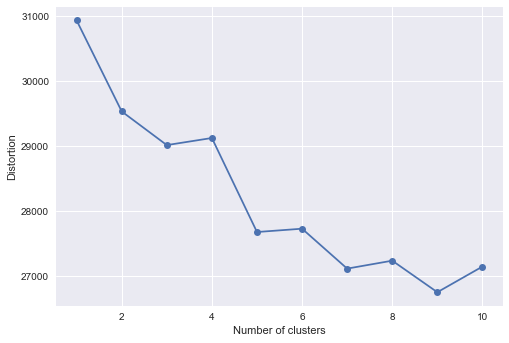

In [94]:
distortions = []
for i in range(1, 11):
    print(i)
    km = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=1)
    #print("Clustering sparse data with %s" % km)
    km.fit(v0)
    #print("done in %0.3fs" % (time() - t0))
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [266]:
km = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=1,)
km.fit(v1)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(v1, km.labels_, sample_size=1000))

Silhouette Coefficient: 0.035


In [267]:
print(len(dfRes[dfRes.label == 0]))
print(len(dfRes[dfRes.label == 1]))
print(len(dfRes[dfRes.label == 2]))
#print(len(dfRes[dfRes.label == 3]))

3018
1
53


1
2
3
4
5
6
7
8
9
10


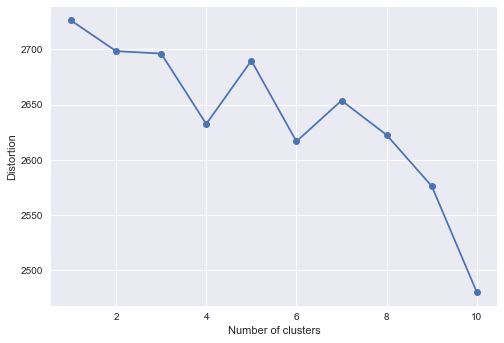

In [93]:
distortions = []
for i in range(1, 11):
    print(i)
    km = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=1)
    #print("Clustering sparse data with %s" % km)
    km.fit(v1)
    #print("done in %0.3fs" % (time() - t0))
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()